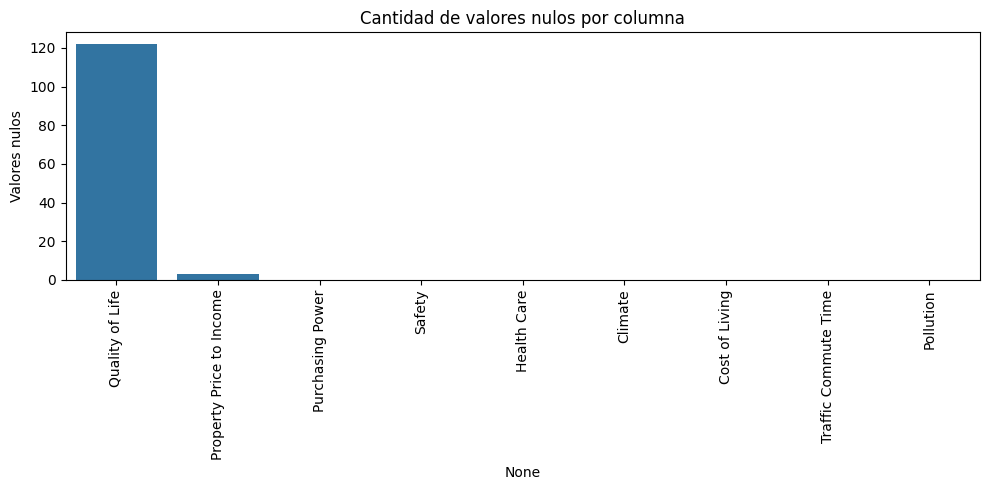

,country,Purchasing Power,Purchasing Power Category,Safety,Safety Category,Health Care,Health Care Category,Climate,Climate Category,Cost of Living,Cost of Living Category,Property Price to Income,Property Price to Income Category,Traffic Commute Time,Traffic Commute Time Category,Pollution,Pollution Category,Quality of Life,Quality of Life Category
0,Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,None,21.08,Very Low,7.80,Low,56.17,Very High,84.44,Very High,NaN,None
1,Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,None,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,NaN,None
2,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
3,Alderney,0.00,None,83.79,Very High,100.00,Very High,0.00,None,0.00,None,0.00,None,5.00,Very Low,1.72,Very Low,NaN,None
4,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Quality_of_Life.csv")
df_clean = df.copy()

#Limpiar Data
df_clean = df_clean.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)
df_clean['Quality of Life Value'] = df_clean['Quality of Life Value'].astype(str).str.replace(": ", "").replace("0.0", None)
df_clean['Quality of Life Value'] = pd.to_numeric(df_clean['Quality of Life Value'], errors='coerce')
value_cols = [col for col in df_clean.columns if "Value" in col and col != 'country']
df_clean.rename(columns={col: col.replace(" Value", "") for col in df_clean.columns if " Value" in col}, inplace=True)
value_cols = [col for col in df_clean.columns if col != 'country' and 'Category' not in col]
df_clean[value_cols] = df_clean[value_cols].apply(pd.to_numeric, errors='coerce')
null_summary = df_clean[value_cols].isnull().sum().sort_values(ascending=False)

# Graficar los nulos para entender visualmente
plt.figure(figsize=(10, 5))
sns.barplot(x=null_summary.index, y=null_summary.values)
plt.xticks(rotation=90)
plt.title("Cantidad de valores nulos por columna")
plt.ylabel("Valores nulos")
plt.tight_layout()
plt.show()

df_clean.head()


In [55]:
# Guatemala
data_gt = df_clean[df_clean['country'] == 'Guatemala'][value_cols].squeeze()
ranking = df_clean[value_cols].rank(ascending=False)

comparacion_mundial = pd.DataFrame({
    'Guatemala': data_gt,
    'Promedio Mundial': df_clean[value_cols].mean(),
    'Ranking Guatemala': ranking[df_clean['country'] == 'Guatemala'].values.flatten(),
    'Percentil Guatemala': df_clean[value_cols].rank(pct=True).loc[df_clean['country'] == 'Guatemala'].values.flatten() * 100
})

# Redondear valores
comparison_world = comparacion_mundial.round(2)

# Visualizar la tabla
print("Comparación Guatemala vs Promedio Mundial")
print(comparison_world)



Comparación Guatemala vs Promedio Mundial
                          Guatemala  Promedio Mundial  Ranking Guatemala  \
Purchasing Power              40.26             55.57              127.0   
Safety                        41.92             55.27              185.0   
Health Care                   67.33             54.73               66.0   
Climate                       99.89             37.60                1.0   
Cost of Living                36.67             37.53              120.0   
Property Price to Income      11.44             22.30              119.0   
Traffic Commute Time          50.58             28.49               18.0   
Pollution                     73.47             54.27               60.0   
Quality of Life              107.92            131.39               80.0   

                          Percentil Guatemala  
Purchasing Power                        46.61  
Safety                                  22.03  
Health Care                             72.46  
Clima

<Figure size 1000x600 with 0 Axes>

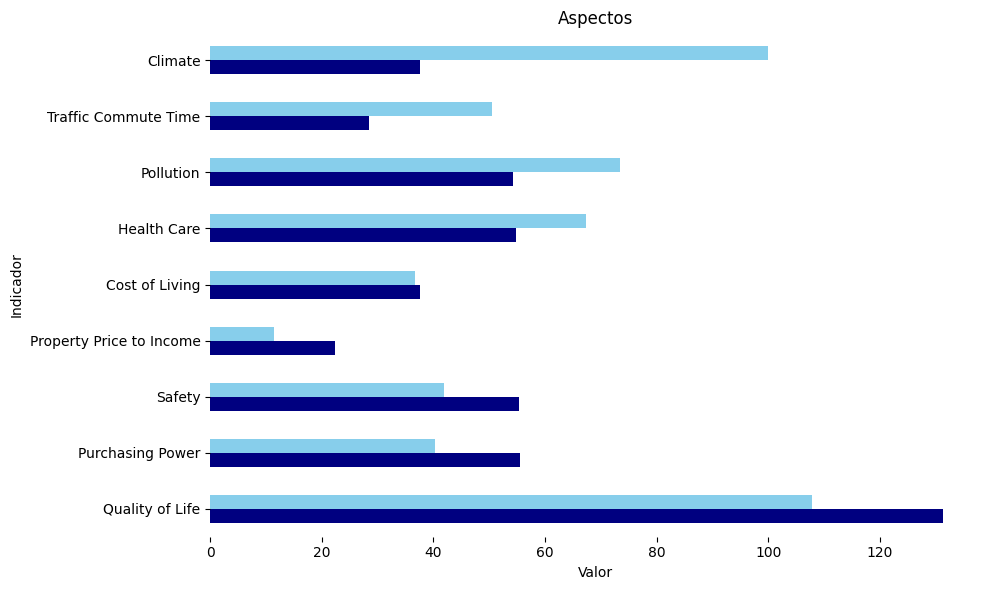

In [56]:
# Ordenar por diferencia para claridad visual
comparison_world['Diferencia'] = comparison_world['Guatemala'] - comparison_world['Promedio Mundial']
comparison_world = comparison_world.sort_values('Diferencia', ascending=False)

# Gráfico de barras personalizado con colores
plt.figure(figsize=(10, 6))
ax = comparison_world[['Guatemala', 'Promedio Mundial']].plot(
    kind='barh',
    color=['skyblue', 'navy'],
    figsize=(10, 6)
)

plt.title("Aspectos")
plt.xlabel("Valor")
plt.ylabel("Indicador")
plt.gca().invert_yaxis()

# Estética limpia
for spine in ax.spines.values():
    spine.set_visible(False)
plt.legend().remove()
plt.grid(False)
plt.tight_layout()
plt.show()


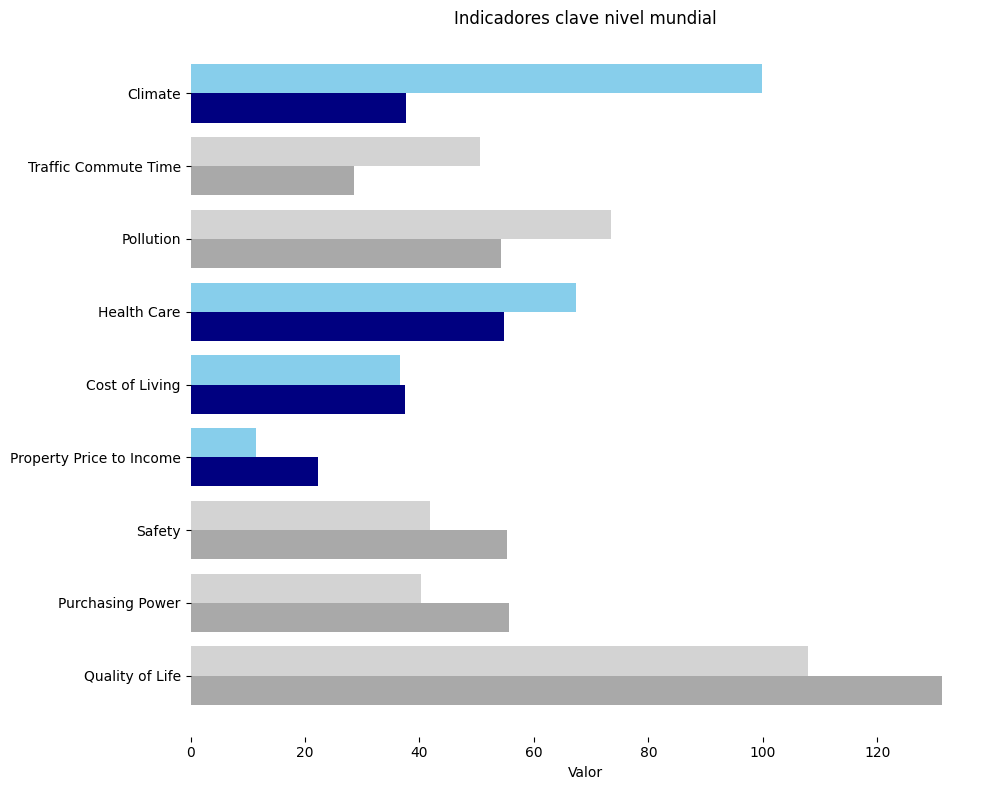

In [57]:
import matplotlib.pyplot as plt
import pandas as pd


# Crear la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Parámetros
bar_width = 0.4
indices = range(len(comparison_all))

# Colores
resaltar = ["Climate", "Health Care", "Cost of Living", "Property Price to Income"]
colores_guatemala = ["skyblue" if i in resaltar else "lightgray" for i in comparison_all.index]
colores_mundial = ["navy" if i in resaltar else "darkgray" for i in comparison_all.index]

# Dibujar las barras agrupadas
ax.barh([i - bar_width/2 for i in indices], comparison_all['Guatemala'], height=bar_width, color=colores_guatemala, label='Guatemala')
ax.barh([i + bar_width/2 for i in indices], comparison_all['Promedio Mundial'], height=bar_width, color=colores_mundial, label='Promedio Mundial')

# Etiquetas
ax.set_yticks(indices)
ax.set_yticklabels(comparison_all.index)
ax.invert_yaxis()
ax.set_title("Indicadores clave nivel mundial")
ax.set_xlabel("Valor")

# Estilo limpio
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.grid(False)
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


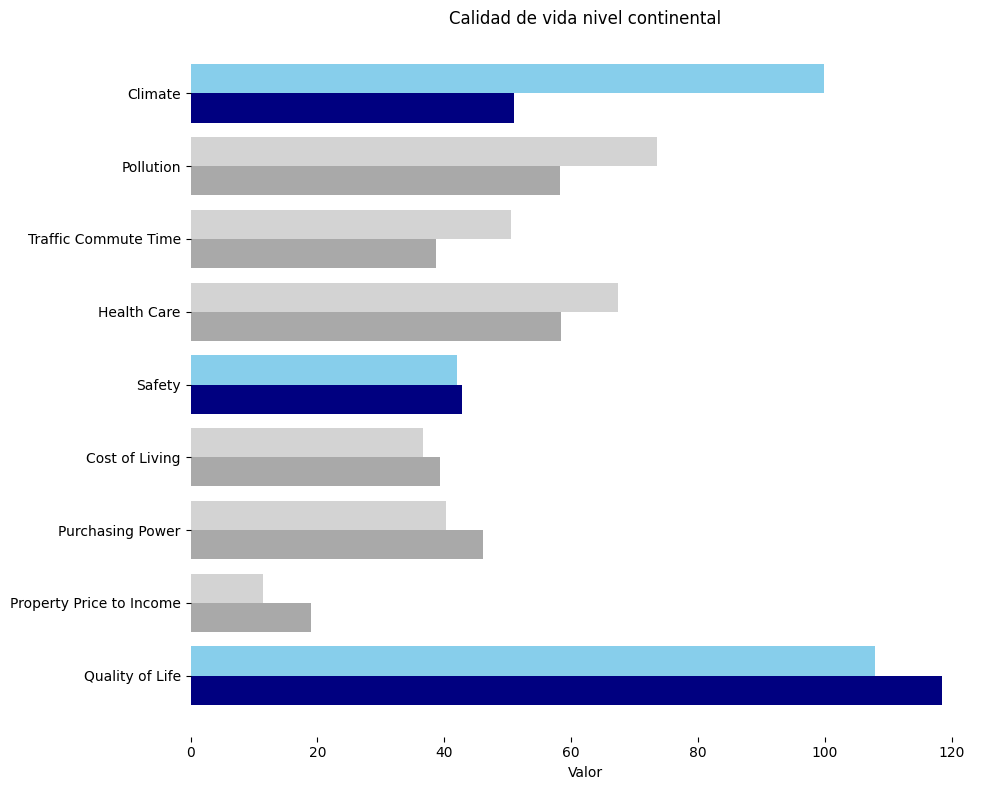

In [58]:
# Lista de países latinoamericanos (aproximada)
paises_latam = [
    'Guatemala', 'El Salvador', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama',
    'Mexico', 'Colombia', 'Venezuela', 'Ecuador', 'Peru', 'Bolivia',
    'Chile', 'Argentina', 'Paraguay', 'Uruguay', 'Brazil', 'Cuba',
    'Dominican Republic', 'United States', 'Canada', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago',
    'Haiti', 'Belize', 'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Grenada', 
    'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Dominica'
]

# Filtrar el dataset para Latinoamérica
df_latam = df_clean[df_clean['country'].isin(paises_latam)]
promedio_latam = df_latam[value_cols].mean()
guatemala_latam = df_latam[df_latam['country'] == 'Guatemala'][value_cols].squeeze()

# Crear DataFrame de comparación
comparison_latam = pd.DataFrame({
    'Guatemala': guatemala_latam,
    'Promedio LATAM': promedio_latam
}).dropna().round(2)

# Ordenar por diferencia
comparison_latam['Diferencia'] = comparison_latam['Guatemala'] - comparison_latam['Promedio LATAM']
comparison_latam = comparison_latam.sort_values('Diferencia', ascending=False)
resaltar = ["Climate", "Safety", "Quality of Life"]
colores_gt = ["skyblue" if i in resaltar else "lightgray" for i in comparison_latam.index]
colores_latam = ["navy" if i in resaltar else "darkgray" for i in comparison_latam.index]

# Graficar todo
bar_width = 0.4
indices = range(len(comparison_latam))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh([i - bar_width/2 for i in indices], comparison_latam['Guatemala'], height=bar_width, color=colores_gt, label='Guatemala')
ax.barh([i + bar_width/2 for i in indices], comparison_latam['Promedio LATAM'], height=bar_width, color=colores_latam, label='Promedio LATAM')
ax.set_yticks(indices)
ax.set_yticklabels(comparison_latam.index)
ax.invert_yaxis()
ax.set_title("Calidad de vida nivel continental")
ax.set_xlabel("Valor")
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.grid(False)
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [66]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("Quality_of_Life.csv")
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)
df['Quality of Life Value'] = df['Quality of Life Value'].astype(str).str.replace(": ", "")
df['Quality of Life Value'] = pd.to_numeric(df['Quality of Life Value'], errors='coerce')

# Filtrar solo columnas de categorías + país
category_cols = ['country'] + [col for col in df.columns if col.endswith('Category')]
top10 = df.sort_values(by='Quality of Life Value', ascending=False).dropna(subset=['Quality of Life Value']).head(10)
top10_categories = top10[category_cols]


print("Top 10 países con mejor calidad de vida (categorías cualitativas):")
print(top10_categories.to_string(index=False))




Top 10 países con mejor calidad de vida (categorías cualitativas):
    country Purchasing Power Category Safety Category Health Care Category Climate Category Cost of Living Category Property Price to Income Category Traffic Commute Time Category Pollution Category Quality of Life Category
 Luxembourg                 Very High            High                 High        Very High                Moderate                          Moderate                           Low                Low                Very High
       Oman                 Very High       Very High                 High             High                Very Low                          Very Low                      Very Low                Low                Very High
Netherlands                 Very High            High                 High        Very High                Moderate                               Low                      Very Low                Low                Very High
    Denmark                 Very High

In [67]:
# Definir lista extendida de países latinoamericanos, del Caribe y Norteamérica
paises_latam_caribe_na = [
    'Guatemala', 'El Salvador', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama',
    'Mexico', 'Colombia', 'Venezuela', 'Ecuador', 'Peru', 'Bolivia',
    'Chile', 'Argentina', 'Paraguay', 'Uruguay', 'Brazil', 'Cuba',
    'Dominican Republic', 'Haiti', 'Jamaica', 'Puerto Rico', 'Trinidad And Tobago',
    'United States', 'Canada'
]

# Filtrar
df_latam = df[df['country'].isin(paises_latam_caribe_na)]
top10_latam = df_latam.sort_values(by='Quality of Life Value', ascending=False).dropna(subset=['Quality of Life Value']).head(10)
category_cols = ['country'] + [col for col in df.columns if col.endswith('Category')]
top10_latam_categories = top10_latam[category_cols]


top10_latam_categories.reset_index(drop=True, inplace=True)
top10_latam_categories.columns = [col.replace(" Category", "") for col in top10_latam_categories.columns]
top10_latam_categories


,country,Purchasing Power,Safety,Health Care,Climate,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Quality of Life
0,United States,Very High,Moderate,High,High,Moderate,Very Low,Low,Low,Very High
1,Canada,Very High,Moderate,High,Moderate,Moderate,Moderate,Low,Low,Very High
2,Uruguay,Low,Moderate,High,Very High,Low,High,Moderate,Moderate,Moderate
3,Costa Rica,Low,Moderate,High,Very High,Low,Moderate,Very High,Moderate,Moderate
4,Mexico,Low,Moderate,High,Very High,Very Low,Moderate,Moderate,Moderate,Moderate
5,Ecuador,Low,Low,High,Very High,Very Low,High,Moderate,Moderate,Moderate
6,Panama,Low,Moderate,High,High,Low,Moderate,Moderate,Moderate,Moderate
7,Brazil,Low,Low,Moderate,Very High,Very Low,High,Moderate,Moderate,Low
8,Argentina,Low,Low,High,Very High,Very Low,Very High,High,Moderate,Low
9,Paraguay,Low,Low,High,Very High,Very Low,High,High,High,Low


In [49]:
import plotly.express as px

fig = px.choropleth(
    df_clean,
    locations="country",
    locationmode="country names",
    color="Climate Category",
    color_discrete_map={
        "Very High": "darkgreen",
        "High": "green",
        "Moderate": "gold",
        "Low": "orange",
        "Very Low": "red"
    },
    title="Clima por País",
    projection="natural earth"
)

fig.show()

In [37]:
import plotly.express as px

fig = px.choropleth(
    df_clean,
    locations="country",
    locationmode="country names",
    color="Health Care Category",
    color_discrete_map={
        "Very High": "darkgreen",
        "High": "green",
        "Moderate": "gold",
        "Low": "orange",
        "Very Low": "red"
    },
    title="Servicios de Salud por País",
    projection="natural earth"
)

fig.show()

In [39]:
import plotly.express as px

fig = px.choropleth(
    df_clean,
    locations="country",
    locationmode="country names",
    color="Cost of Living Category",
    color_discrete_map={
        "Very High": "darkgreen",
        "High": "green",
        "Moderate": "gold",
        "Low": "orange",
        "Very Low": "red"
    },
    title="Cost of Living por País",
    projection="natural earth"
)

fig.show()

In [40]:
import plotly.express as px

fig = px.choropleth(
    df_clean,
    locations="country",
    locationmode="country names",
    color="Property Price to Income Category",
    color_discrete_map={
        "Very High": "darkgreen",
        "High": "green",
        "Moderate": "gold",
        "Low": "orange",
        "Very Low": "red"
    },
    title="PPTI por País",
    projection="natural earth"
)

fig.show()

In [30]:
import plotly.express as px
fig = px.choropleth(
    df_clean,
    locations="country",
    locationmode="country names",
    color="Quality of Life Category",
    color_discrete_map={
        "Very High": "darkgreen",
        "High": "green",
        "Moderate": "gold",
        "Low": "orange",
        "Very Low": "red"
    },
    title="Categorías de Calidad de Vida por País",
    projection="natural earth"
)

fig.show()
